In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df=pd.read_csv("income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (25000, 15)
Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


# EDA

In [4]:
# missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [5]:
# describe
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


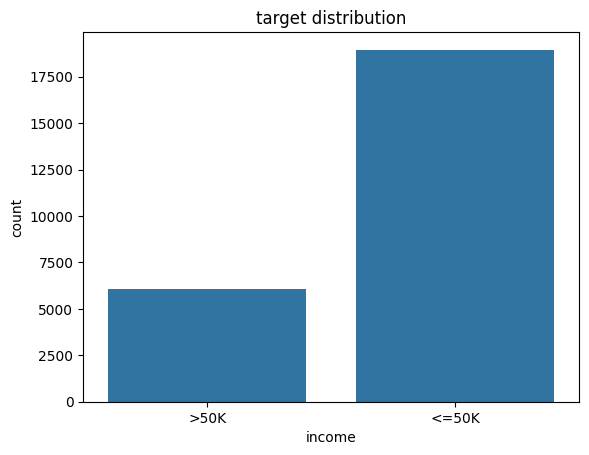

In [6]:
# target distribution
sns.countplot(x="income",data=df)
plt.title("target distribution")
plt.show()

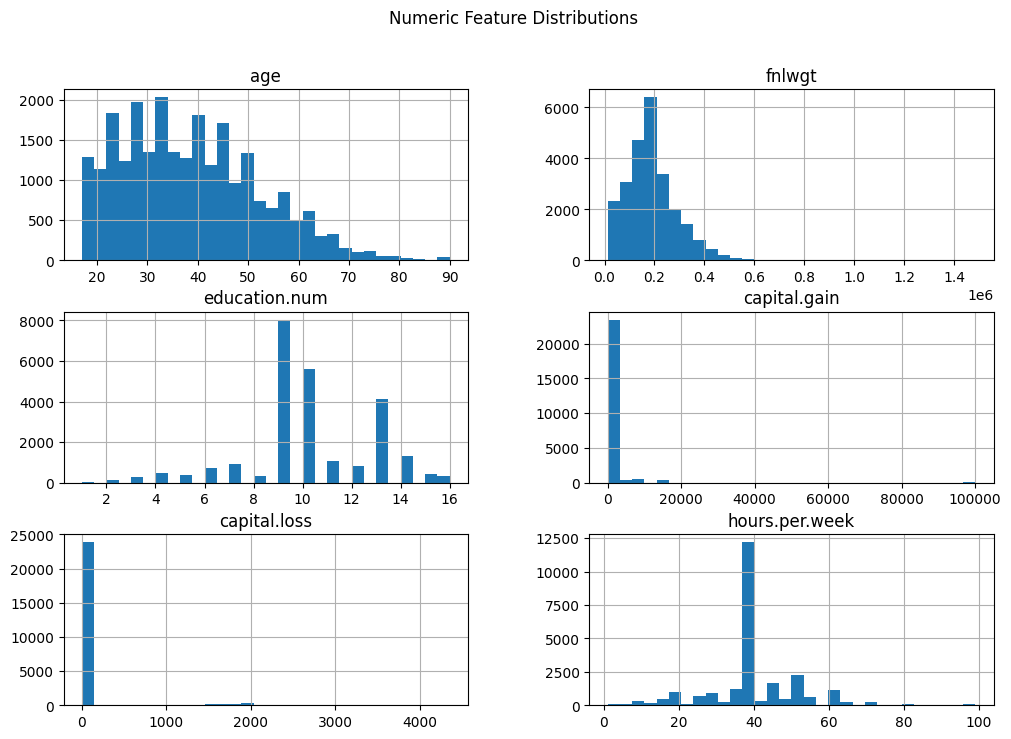

In [7]:
# Step 2.4: Numeric distributions
df.hist(bins=30, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions")
plt.show()

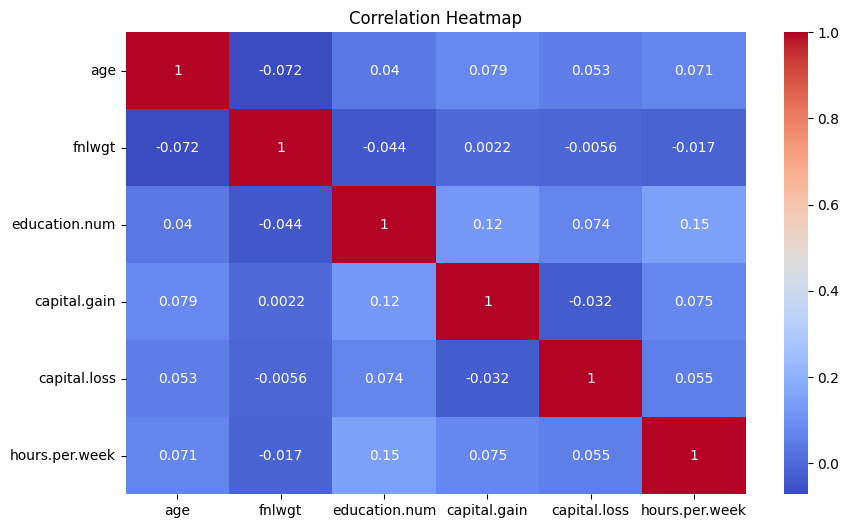

In [8]:
# correaltion heatmap
numeric_cols=df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
# encode categorical col
x=pd.get_dummies(df.drop("income",axis=1),drop_first=True)
print(x)

       age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0       40  223881             15         99999             0              70   
1       30  149118              9             0             0              40   
2       46  109209             10             0             0              40   
3       32  229566             11             0             0              60   
4       54  148657              1             0             0              40   
...    ...     ...            ...           ...           ...             ...   
24995   40  130834             10             0             0              40   
24996   31   33124             13             0             0              50   
24997   38  190895             13             0             0              40   
24998   23  420973             13             0             0              40   
24999   60   88055              6             0             0              40   

       workclass_Federal-go

In [21]:
le=LabelEncoder()
print(le)
y=le.fit_transform(df['income'])
print(y)

LabelEncoder()
[1 0 1 ... 1 0 0]


In [25]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
# feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# ANN with MLPClassifier

In [34]:
from sklearn.neural_network import MLPClassifier

In [36]:
mlp=MLPClassifier(
    hidden_layer_sizes=(128,64),  # two hidden layer
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)

In [38]:
# train model
mlp.fit(x_train,y_train)

C:\Users\HP\Desktop\new\krish_naik_udemy\krish-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)

In [40]:
# predictions
y_pred=mlp.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Accuracy
print("Ann Accuracy:",accuracy_score(y_test,y_pred))

Ann Accuracy: 0.8042


In [46]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3791
           1       0.59      0.64      0.61      1209

    accuracy                           0.80      5000
   macro avg       0.73      0.75      0.74      5000
weighted avg       0.81      0.80      0.81      5000



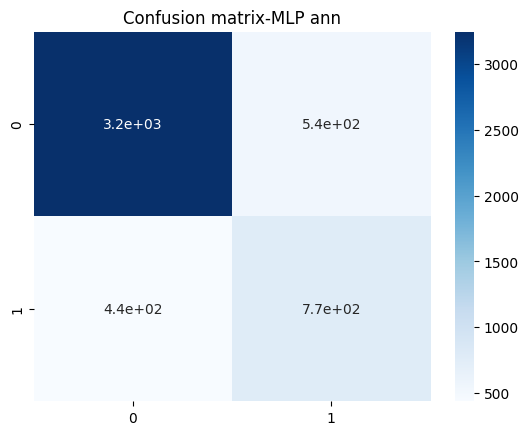

In [48]:
# confusion matrix for this
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
plt.title("Confusion matrix-MLP ann")
plt.show()

In [56]:
import pickle

# Save trained model
pickle.dump(mlp, open("mlp_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save LabelEncoder (target)
pickle.dump(le, open("label_encoder.pkl", "wb"))

# Save feature names (important for consistency in deployment)
pickle.dump(list(x.columns), open("features.pkl", "wb"))